# Notebook with example for simulating the Less-than Oracle

In [43]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit_aer.backends import AerSimulator

import functions_oracles as func

Initial data

In [2]:
number = 13
nqubits = 6

In [5]:
circuit = QuantumCircuit(nqubits)

In [6]:
circuit.h(range(nqubits))

In [3]:
oracle = func.oracle_less_than(number=number, nqubits=nqubits)

In [7]:
circuit.append(oracle, range(nqubits))

Diffuser for Grover's Algorithm

In [12]:
diffuser = QuantumCircuit(nqubits, name=' Diffuser ')

diffuser.h(range(nqubits))
diffuser.x(range(nqubits))
diffuser.append(func.multi_control_z(nqubits), range(nqubits))
diffuser.x(range(nqubits))
diffuser.h(range(nqubits))

In [14]:
circuit.append(diffuser, range(nqubits))

Add measures

In [31]:
circuit.measure_all()

# Draw of Circuits

### By Modules

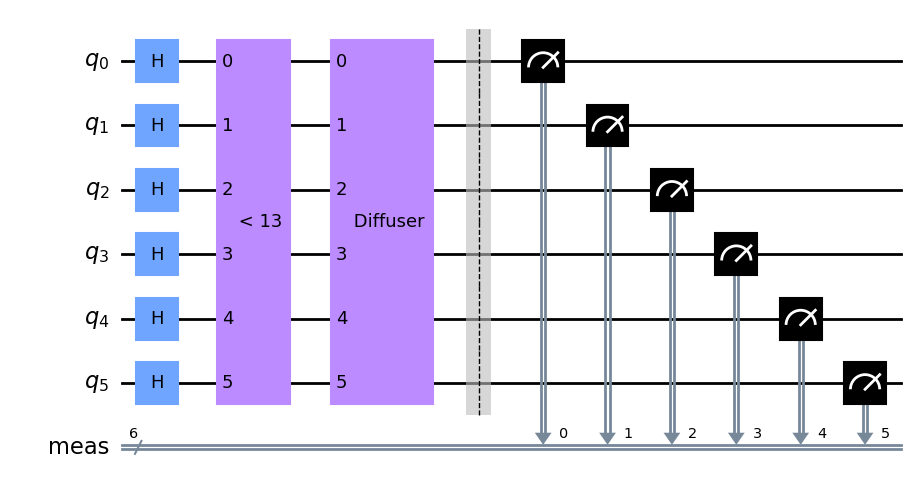

In [32]:
circuit.draw(output='mpl')

### Decomposed

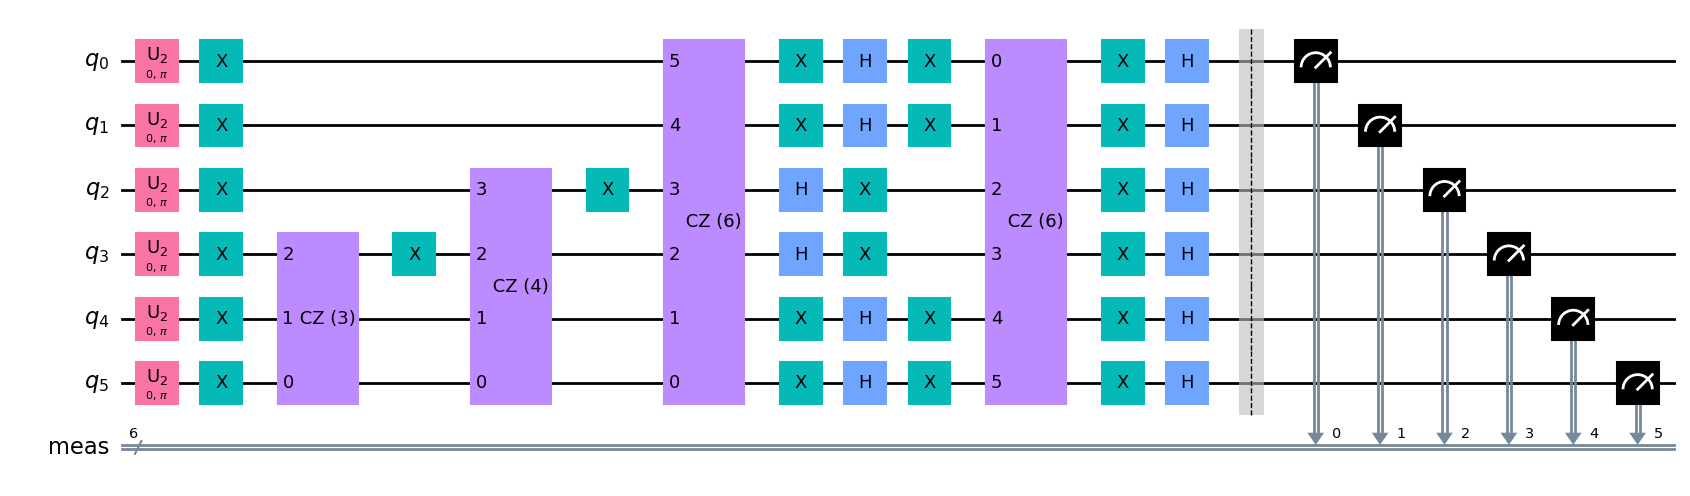

In [33]:
circuit.decompose().draw(output='mpl')

# Simulation of circuit

In [34]:
nshots = 20000

Choose Backend

In [51]:
backend = Aer.get_backend('aer_simulator_statevector')

Transpile and execute circuit

In [52]:
qc_transpiled=transpile(circuit, backend=backend)

In [53]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

Results

In [54]:
result = job.result()

In [55]:
result.get_counts()

{'101100': 8,
 '110100': 9,
 '000011': 1510,
 '111101': 4,
 '100011': 11,
 '001100': 1463,
 '001000': 1453,
 '111110': 11,
 '100010': 15,
 '001011': 1462,
 '101111': 13,
 '110001': 9,
 '000110': 1465,
 '110011': 7,
 '101101': 19,
 '000100': 1565,
 '001001': 1502,
 '110000': 9,
 '000111': 1504,
 '110111': 9,
 '000000': 1490,
 '111111': 13,
 '100001': 10,
 '001010': 1481,
 '110110': 13,
 '101010': 13,
 '000001': 1509,
 '100101': 8,
 '111011': 11,
 '001110': 8,
 '101011': 11,
 '110101': 9,
 '000010': 1511,
 '110010': 16,
 '101110': 8,
 '000101': 1535,
 '111010': 9,
 '001111': 13,
 '100110': 11,
 '010101': 13,
 '001101': 9,
 '111100': 8,
 '100100': 17,
 '011110': 6,
 '101001': 9,
 '011100': 6,
 '010000': 10,
 '100000': 12,
 '011101': 14,
 '111001': 14,
 '011011': 10,
 '010111': 14,
 '010001': 10,
 '011111': 9,
 '010110': 11,
 '111000': 16,
 '100111': 14,
 '010011': 15,
 '011010': 10,
 '010100': 15,
 '011000': 10,
 '010010': 9,
 '011001': 7,
 '101000': 5}